In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib.widgets import Button
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the datasets and Parse the TIMESTAMP into datetime objects
train_data = pd.read_csv('TrainData.csv', parse_dates=['TIMESTAMP'])
weather_forecast = pd.read_csv('WeatherForecastInput.csv', parse_dates=['TIMESTAMP'])
solution_data = pd.read_csv('Solution.csv', parse_dates=['TIMESTAMP'])


# Linear Regression

In [3]:
# Selecting X_train WS10 and y_train POWER from TrainData
X_train = train_data['WS10']
y_train = train_data['POWER']

In [4]:
# Extracting WS10 as X_test and its corresponding TIMESTAMP
X_test = weather_forecast['WS10']
test_timestamp = weather_forecast['TIMESTAMP']


In [5]:
# Extract corresponding POWER values from Solution.csv
y_test = solution_data['POWER']


In [6]:
# Model training and prediction
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)
y_pred = model.predict(X_test.values.reshape(-1, 1))


### Model evaluation: RMSE

In [7]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


RMSE: 0.216384085623544


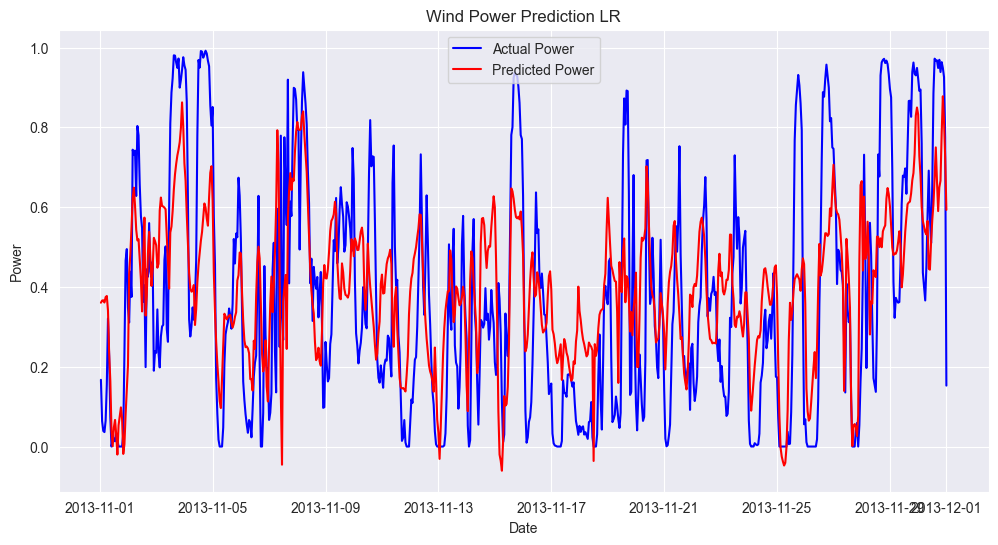

In [8]:
# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_timestamp, y_test, label='Actual Power', color='blue')
plt.plot(test_timestamp, y_pred, label='Predicted Power', color='red')
plt.title('Wind Power Prediction LR')
plt.xlabel('Date')
plt.ylabel('Power')
plt.legend()
plt.show()

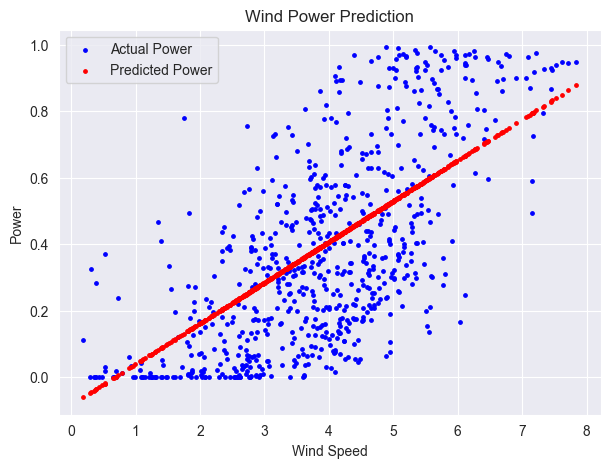

In [9]:
# plotting test data with predictions
plt.figure(figsize=(7, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Power', s=6)
plt.scatter(X_test, y_pred, color='red', label='Predicted Power', s=6)
plt.title('Wind Power Prediction')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.legend()
plt.show()


# K-Nearest Neighbors

In [10]:
# Model training and prediction
knn_model = KNeighborsRegressor(n_neighbors=1600)
knn_model.fit(X_train.values.reshape(-1, 1), y_train)
y_pred_knn = knn_model.predict(X_test.values.reshape(-1, 1))

In [11]:
""" # Cross-validation to find the best k
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
k_range = range(1, 2000)
cv_scores = []
for k in k_range:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train.values.reshape(-1, 1), y_train, cv=kf, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(scores))
"""

" # Cross-validation to find the best k\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.model_selection import KFold\nkf = KFold(n_splits=5, shuffle=True, random_state=42)\nk_range = range(1, 2000)\ncv_scores = []\nfor k in k_range:\n    knn_model = KNeighborsRegressor(n_neighbors=k)\n    scores = cross_val_score(knn_model, X_train.values.reshape(-1, 1), y_train, cv=kf, scoring='neg_mean_squared_error')\n    cv_scores.append(np.mean(scores))\n"

In [12]:
# Display the best K
#best_k = k_range[np.argmax(cv_scores)]
#best_k


In [13]:
""" # Plotting the cross-validation scores
plt.figure(figsize=(12, 6))
plt.plot(k_range, cv_scores, label='Cross-Validation MSE', color='blue')
plt.title('Cross-Validation MSE vs K')
plt.xlabel('K')
plt.ylabel('MSE')
plt.axvline(x=best_k, color='red', linestyle='--', label='Best K {}'.format(best_k))
plt.legend()
plt.show()"""

" # Plotting the cross-validation scores\nplt.figure(figsize=(12, 6))\nplt.plot(k_range, cv_scores, label='Cross-Validation MSE', color='blue')\nplt.title('Cross-Validation MSE vs K')\nplt.xlabel('K')\nplt.ylabel('MSE')\nplt.axvline(x=best_k, color='red', linestyle='--', label='Best K {}'.format(best_k))\nplt.legend()\nplt.show()"

### Model evaluation: RMSE

In [11]:
rmse_knn = sqrt(mean_squared_error(y_test, y_pred_knn))
print(f'RMSE KNN: {rmse_knn}')

RMSE KNN: 0.21633473731549857


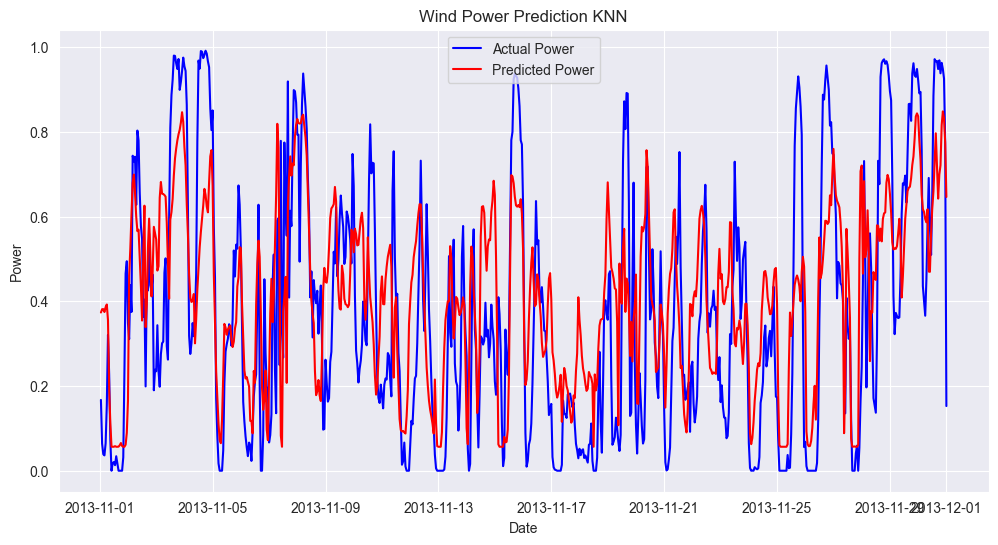

In [12]:
# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_timestamp, y_test, label='Actual Power', color='blue')
plt.plot(test_timestamp, y_pred_knn, label='Predicted Power', color='red')
plt.title('Wind Power Prediction KNN')
plt.xlabel('Date')
plt.ylabel('Power')
plt.legend()
plt.show()

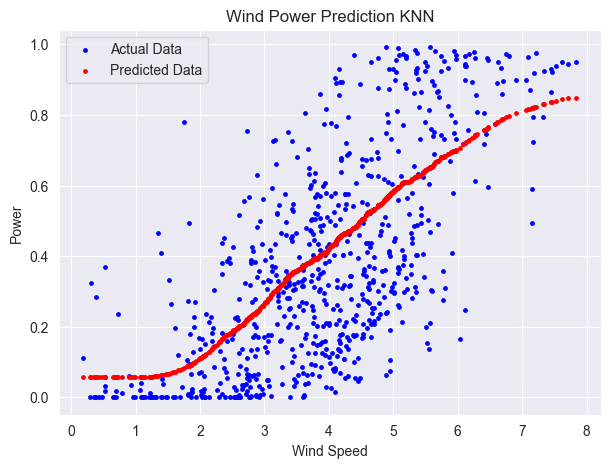

In [13]:
# plotting test data with predictions
plt.figure(figsize=(7, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data', s=6)
plt.scatter(X_test, y_pred_knn, color='red', label='Predicted Data', s=6)
plt.title('Wind Power Prediction KNN')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.legend()
plt.show()

# Support Vector Regression

In [14]:
# Model training and prediction. use linear kernel C = 100 and epsilon = 0.1
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train.values.reshape(-1, 1), y_train)
y_pred_svr = svr_model.predict(X_test.values.reshape(-1, 1))


In [15]:
# Model evaluation
# RMSE
rmse_svr = sqrt(mean_squared_error(y_test, y_pred_svr))
print(f'RMSE SVR: {rmse_svr}')

RMSE SVR: 0.21377164641772908


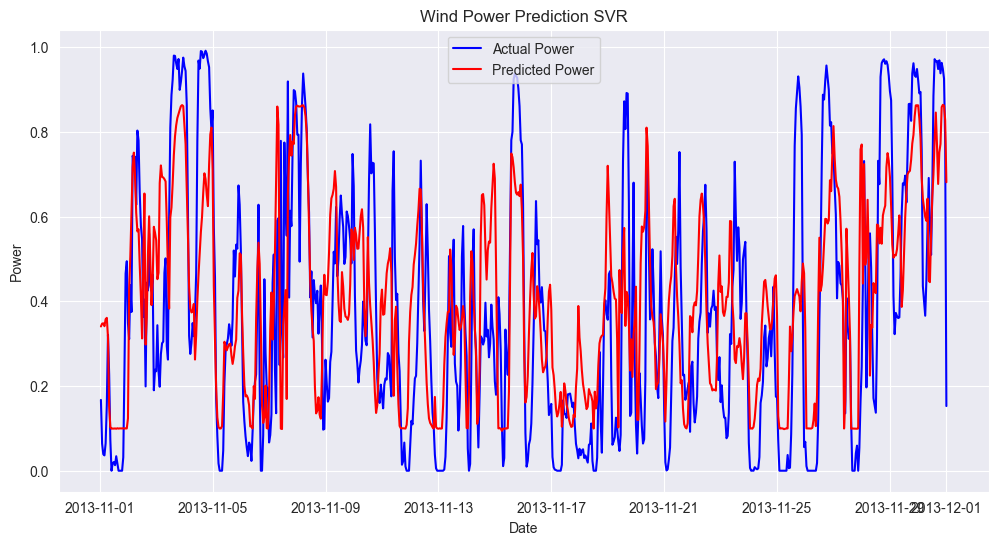

In [16]:
# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_timestamp, y_test, label='Actual Power', color='blue')
plt.plot(test_timestamp, y_pred_svr, label='Predicted Power', color='red')
plt.title('Wind Power Prediction SVR')
plt.xlabel('Date')
plt.ylabel('Power')
plt.legend()

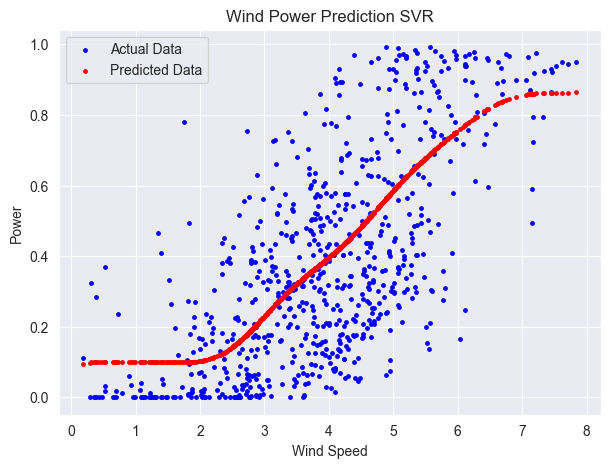

In [17]:
# Plotting test data with predictions
plt.figure(figsize=(7, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data', s=6)
plt.scatter(X_test, y_pred_svr, color='red', label='Predicted Data', s=6)
plt.title('Wind Power Prediction SVR')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.legend()
plt.show()

# Neural Network

In [18]:
# Model training and prediction
ann_model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
ann_model.fit(X_train.values.reshape(-1, 1), y_train)
y_pred_mlp = ann_model.predict(X_test.values.reshape(-1, 1))


In [19]:
# Model evaluation
# RMSE
rmse_mlp = sqrt(mean_squared_error(y_test, y_pred_mlp))
print(f'RMSE MLP: {rmse_mlp}')


RMSE MLP: 0.21544958677605122


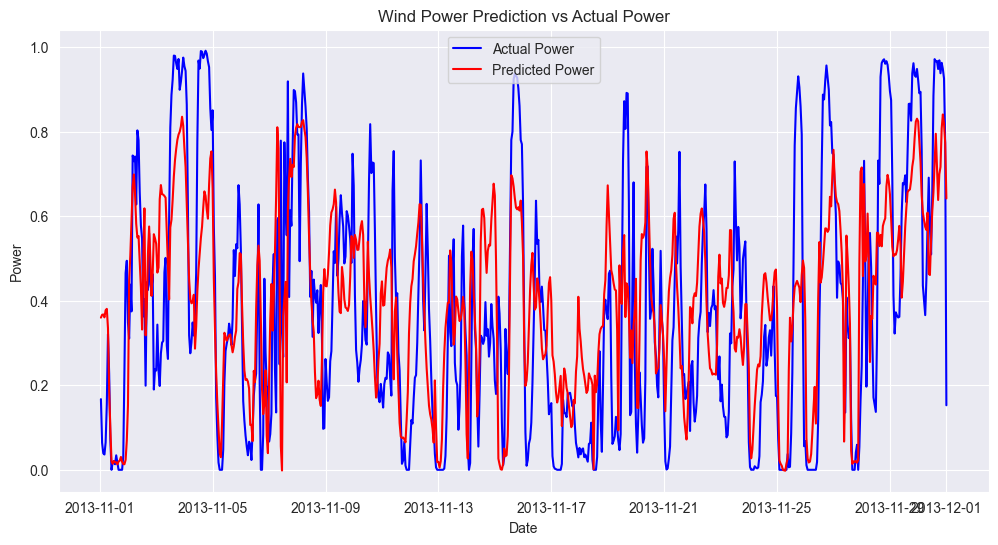

In [20]:
# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_timestamp, y_test, label='Actual Power', color='blue')
plt.plot(test_timestamp, y_pred_mlp, label='Predicted Power', color='red')
plt.title('Wind Power Prediction vs Actual Power')
plt.xlabel('Date')
plt.ylabel('Power')
plt.legend()
plt.show()

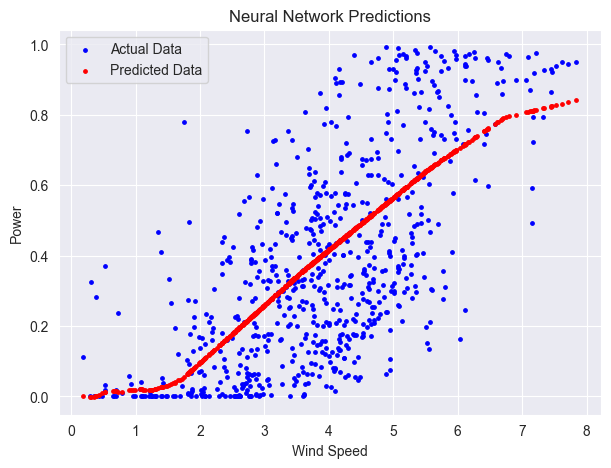

In [21]:
# Plotting test and predicted data
plt.figure(figsize=(7, 5))
plt.scatter(X_test, y_test, color='b', label='Actual Data', s=6)
plt.scatter(X_test, y_pred_mlp, color='red', label='Predicted Data', s=6)
plt.title('Neural Network Predictions')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.legend()
plt.show()


# Root Mean Square Error (RMSE) Comparison Table

In [22]:
# Displaying all RMSE values in a table
rmse_values = {
    'Model': ['Linear Regression', 'K-nearest neighbors', 'Support Vector Regression', 'Neural Network'],
    'RMSE': [rmse, rmse_knn, rmse_svr, rmse_mlp]
}
rmse_df = pd.DataFrame(rmse_values).round(5)
rmse_df.set_index('Model', inplace=True)
rmse_df


,RMSE
Model,
Linear Regression,0.21638
K-nearest neighbors,0.21633
Support Vector Regression,0.21377
Neural Network,0.21545
